# FAANG Stock Market Prediction Based On News Sentiments Using Machine Learning

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
from textblob import TextBlob
from wordcloud import WordCloud
import re
import string
string.punctuation
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


import pandas as pd
import numpy as np
from textblob import TextBlob
import re

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from scikitplot.metrics import plot_confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zeraphim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Extraction

In [2]:
stock = pd.read_csv('FAANG_STOCK_NEWS.csv')

In [3]:
stock.shape

(500, 9)

In [4]:
stock.head()

,Unnamed: 0,ticker,date,time,headline,neg,neu,pos,compound
0,0,FB,2021-09-22,06:30AM,2 Growth Stocks to Buy Hand Over Fist If the M...,0.000,0.608,0.392,0.7003
1,1,FB,2021-09-22,02:23AM,UPDATE 1-Facebook wraps up deals with Australi...,0.167,0.833,0.000,-0.3400
2,2,FB,2021-09-22,12:36AM,Facebook wraps up deals with Australian media ...,0.179,0.821,0.000,-0.3400
3,3,FB,2021-09-22,12:27AM,Facebook wraps up deals with Australia media f...,0.000,1.000,0.000,0.0000
4,4,FB,2021-09-21,10:34PM,Facebook overpaid FTC fine as quid pro quo to ...,0.099,0.659,0.242,0.3818


In [5]:
#drop unnamed: 0
stock = stock.drop('Unnamed: 0', 1)
stock.head()

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/576919919.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  stock = stock.drop('Unnamed: 0', 1)


,ticker,date,time,headline,neg,neu,pos,compound
0,FB,2021-09-22,06:30AM,2 Growth Stocks to Buy Hand Over Fist If the M...,0.000,0.608,0.392,0.7003
1,FB,2021-09-22,02:23AM,UPDATE 1-Facebook wraps up deals with Australi...,0.167,0.833,0.000,-0.3400
2,FB,2021-09-22,12:36AM,Facebook wraps up deals with Australian media ...,0.179,0.821,0.000,-0.3400
3,FB,2021-09-22,12:27AM,Facebook wraps up deals with Australia media f...,0.000,1.000,0.000,0.0000
4,FB,2021-09-21,10:34PM,Facebook overpaid FTC fine as quid pro quo to ...,0.099,0.659,0.242,0.3818


In [6]:
stock.describe()

,neg,neu,pos,compound
count,500.000000,500.000000,500.000000,500.000000
mean,0.056344,0.822262,0.121406,0.100331
std,0.111799,0.171060,0.157284,0.346107
min,0.000000,0.306000,0.000000,-0.743000
25%,0.000000,0.706750,0.000000,0.000000
50%,0.000000,0.821000,0.000000,0.000000
75%,0.000000,1.000000,0.231000,0.307000
max,0.519000,1.000000,0.694000,0.941300


In [7]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    500 non-null    object 
 1   date      500 non-null    object 
 2   time      500 non-null    object 
 3   headline  500 non-null    object 
 4   neg       500 non-null    float64
 5   neu       500 non-null    float64
 6   pos       500 non-null    float64
 7   compound  500 non-null    float64
dtypes: float64(4), object(4)
memory usage: 31.4+ KB


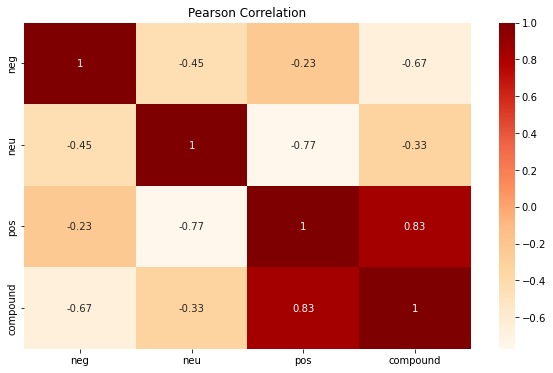

In [8]:
#heatmap correlation
plt.figure(figsize = (10,6))
sns.heatmap(stock.corr(), annot = True, cmap = 'OrRd')
plt.title("Pearson Correlation")
plt.show()

## Text Processing

In [9]:
#selection data
headline = stock[['ticker', 'headline']]
headline.head()

,ticker,headline
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...
2,FB,Facebook wraps up deals with Australian media ...
3,FB,Facebook wraps up deals with Australia media f...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...


In [10]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
headline['clean_headline'] = headline['headline'].apply(lambda x:remove_punctuation(x))
headline.head()

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/630229650.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['clean_headline'] = headline['headline'].apply(lambda x:remove_punctuation(x))


,ticker,headline,clean_headline
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...


In [11]:
#setting lower case
headline['headline_lower'] = headline['clean_headline'].apply(lambda x: x.lower())
headline.head()

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/3175767707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['headline_lower'] = headline['clean_headline'].apply(lambda x: x.lower())


,ticker,headline,clean_headline,headline_lower
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...,2 growth stocks to buy hand over fist if the m...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...,update 1facebook wraps up deals with australia...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...,facebook wraps up deals with australian media ...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...,facebook wraps up deals with australia media f...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...,facebook overpaid ftc fine as quid pro quo to ...


In [12]:
#defining function for tokenization
def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

#applying function to the column
headline['headline_tokenied'] = headline['headline_lower'].apply(lambda x: tokenization(x))
headline.head()

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/2664959738.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['headline_tokenied'] = headline['headline_lower'].apply(lambda x: tokenization(x))


,ticker,headline,clean_headline,headline_lower,headline_tokenied
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...,2 growth stocks to buy hand over fist if the m...,[2 growth stocks to buy hand over fist if the ...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...,update 1facebook wraps up deals with australia...,[update 1facebook wraps up deals with australi...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...,facebook wraps up deals with australian media ...,[facebook wraps up deals with australian media...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...,facebook wraps up deals with australia media f...,[facebook wraps up deals with australia media ...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...,facebook overpaid ftc fine as quid pro quo to ...,[facebook overpaid ftc fine as quid pro quo to...


In [13]:
#stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
headline['no_stopwords']= headline['headline_tokenied'].apply(lambda x:remove_stopwords(x))
headline.head()

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/244815608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['no_stopwords']= headline['headline_tokenied'].apply(lambda x:remove_stopwords(x))


,ticker,headline,clean_headline,headline_lower,headline_tokenied,no_stopwords
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...,2 growth stocks to buy hand over fist if the m...,[2 growth stocks to buy hand over fist if the ...,[2 growth stocks to buy hand over fist if the ...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...,update 1facebook wraps up deals with australia...,[update 1facebook wraps up deals with australi...,[update 1facebook wraps up deals with australi...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...,facebook wraps up deals with australian media ...,[facebook wraps up deals with australian media...,[facebook wraps up deals with australian media...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...,facebook wraps up deals with australia media f...,[facebook wraps up deals with australia media ...,[facebook wraps up deals with australia media ...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...,facebook overpaid ftc fine as quid pro quo to ...,[facebook overpaid ftc fine as quid pro quo to...,[facebook overpaid ftc fine as quid pro quo to...


In [15]:
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

headline['headline_stemmed'] = headline['no_stopwords'].apply(lambda x: stemming(x))
headline.head()

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/3886509765.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['headline_stemmed'] = headline['no_stopwords'].apply(lambda x: stemming(x))


,ticker,headline,clean_headline,headline_lower,headline_tokenied,no_stopwords,headline_stemmed
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...,2 growth stocks to buy hand over fist if the m...,[2 growth stocks to buy hand over fist if the ...,[2 growth stocks to buy hand over fist if the ...,[2 growth stocks to buy hand over fist if the ...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...,update 1facebook wraps up deals with australia...,[update 1facebook wraps up deals with australi...,[update 1facebook wraps up deals with australi...,[update 1facebook wraps up deals with australi...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...,facebook wraps up deals with australian media ...,[facebook wraps up deals with australian media...,[facebook wraps up deals with australian media...,[facebook wraps up deals with australian media...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...,facebook wraps up deals with australia media f...,[facebook wraps up deals with australia media ...,[facebook wraps up deals with australia media ...,[facebook wraps up deals with australia media ...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...,facebook overpaid ftc fine as quid pro quo to ...,[facebook overpaid ftc fine as quid pro quo to...,[facebook overpaid ftc fine as quid pro quo to...,[facebook overpaid ftc fine as quid pro quo to...


## Sentiment Analysis

In [16]:
#selection data
df = headline[['ticker', 'clean_headline']]
df.head()

,ticker,clean_headline
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...
1,FB,UPDATE 1Facebook wraps up deals with Australia...
2,FB,Facebook wraps up deals with Australian media ...
3,FB,Facebook wraps up deals with Australia media f...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...


In [17]:
#create function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [18]:
#apply function to data 
df['subjectivity'] = df['clean_headline'].apply(getSubjectivity)
df['polarity'] = df['clean_headline'].apply(getPolarity)
df.head()

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/2077207536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjectivity'] = df['clean_headline'].apply(getSubjectivity)
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/2077207536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = df['clean_headline'].apply(getPolarity)


,ticker,clean_headline,subjectivity,polarity
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,0.0,0.000000
1,FB,UPDATE 1Facebook wraps up deals with Australia...,0.0,0.000000
2,FB,Facebook wraps up deals with Australian media ...,0.0,0.000000
3,FB,Facebook wraps up deals with Australia media f...,0.0,0.000000
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,0.5,0.416667


In [19]:
#create function to get sentiment data
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#apply function to data
df['sentiment'] = df['polarity'].apply(getSentiment)
df.head()

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/2914808233.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['polarity'].apply(getSentiment)


,ticker,clean_headline,subjectivity,polarity,sentiment
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,0.0,0.000000,Neutral
1,FB,UPDATE 1Facebook wraps up deals with Australia...,0.0,0.000000,Neutral
2,FB,Facebook wraps up deals with Australian media ...,0.0,0.000000,Neutral
3,FB,Facebook wraps up deals with Australia media f...,0.0,0.000000,Neutral
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,0.5,0.416667,Positive


In [20]:
df['sentiment'].value_counts()

Neutral     272
Positive    173
Negative     55
Name: sentiment, dtype: int64

In [21]:
#get headline of sentiment neutral
nl_headline = df[df.sentiment == 'Neutral']
nl_headline = nl_headline['clean_headline']
nl_headline.head()

0    2 Growth Stocks to Buy Hand Over Fist If the M...
1    UPDATE 1Facebook wraps up deals with Australia...
2    Facebook wraps up deals with Australian media ...
3    Facebook wraps up deals with Australia media f...
7    Facebook says Wall Street Journal report alleg...
Name: clean_headline, dtype: object

In [22]:
#get headline of sentiment positive
p_headline = df[df.sentiment == 'Positive']
p_headline = p_headline['clean_headline']
p_headline.head()

4     Facebook overpaid FTC fine as quid pro quo to ...
5     Is GBTC Stock A Good Buy As Bitcoin Slumps Aft...
6     Facebook Oversight Board to Review Special Rul...
8      These Are The 5 Best Stocks To Buy And Watch Now
13    Top Research Reports for Facebook Walmart  Nov...
Name: clean_headline, dtype: object

In [23]:
#get headline of sentiment negative
n_headline = df[df.sentiment == 'Negative']
n_headline = n_headline['clean_headline']
n_headline.head()

22    Facebook spent over 13 billion on safety secur...
23    Facebook spent over 13 bln on safety security ...
28    Facebook Says It Has Spent 13 Billion on Safet...
32    Why Apple Facebook Amazon and Other Tech Stock...
39    TikTok Parent Forced To Restrict Screen Time F...
Name: clean_headline, dtype: object

In [24]:
# Define a function which can be applied to calculate the sentiment score 
def score(x):
    return TextBlob(x).sentiment  
 
df['score'] = df['clean_headline'].apply(score)
df.score.head()

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/819442832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df['clean_headline'].apply(score)


0                   (0.0, 0.0)
1                   (0.0, 0.0)
2                   (0.0, 0.0)
3                   (0.0, 0.0)
4    (0.4166666666666667, 0.5)
Name: score, dtype: object

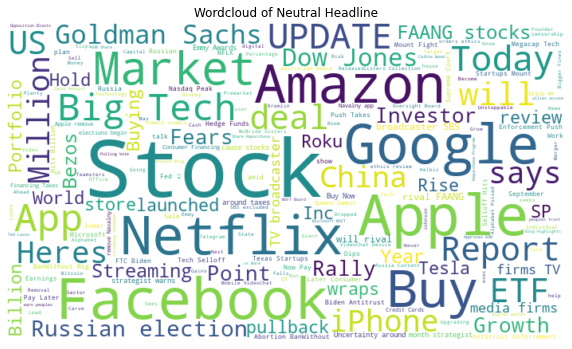

In [25]:
neutral = " ".join(df[df.sentiment == 'Neutral']['clean_headline'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(neutral)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Neutral Headline")
plt.axis('off')
plt.show()

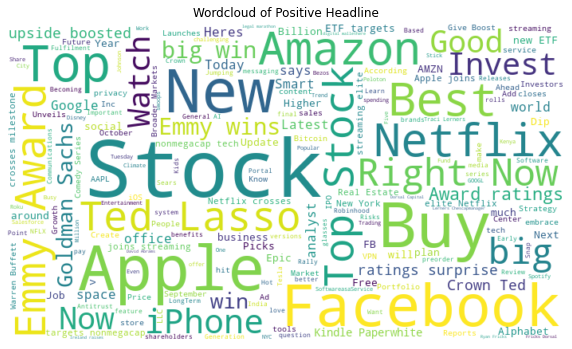

In [26]:
positive = " ".join(df[df.sentiment == 'Positive']['clean_headline'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(positive)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Positive Headline")
plt.axis('off')
plt.show()

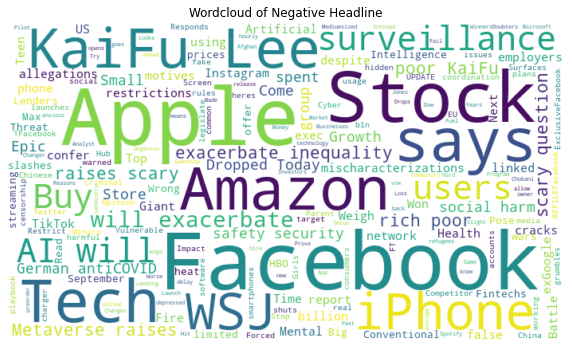

In [27]:
negative = " ".join(df[df.sentiment == 'Negative']['clean_headline'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(negative)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Negative Headline")
plt.axis('off')
plt.show()

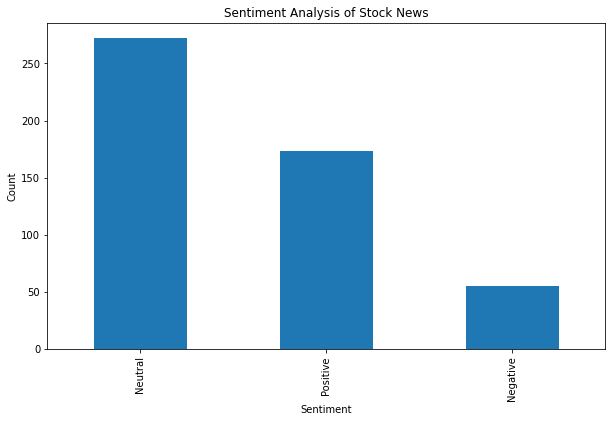

In [28]:
#visualize sentiment
df['sentiment'].value_counts()

plt.figure(figsize = (10,6))
plt.title("Sentiment Analysis of Stock News")
plt.xlabel("Sentiment")
plt.ylabel("Count")

df['sentiment'].value_counts().plot(kind = 'bar')
df2 = df.copy()
df2.insert(2, "date", stock['date'], True)
plt.show()

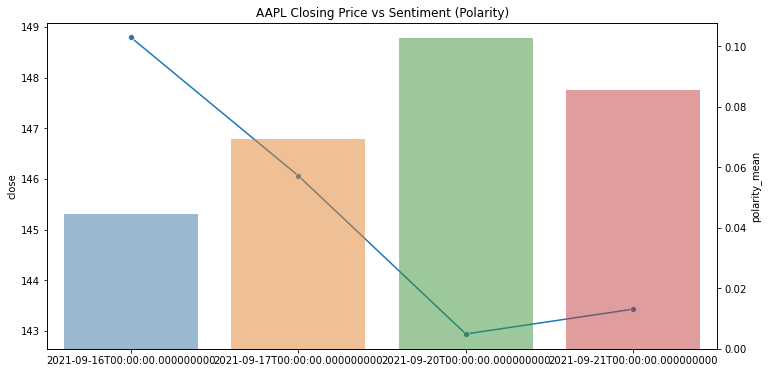

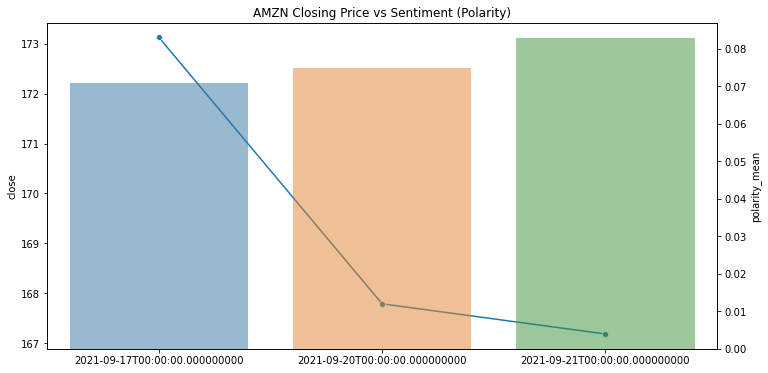

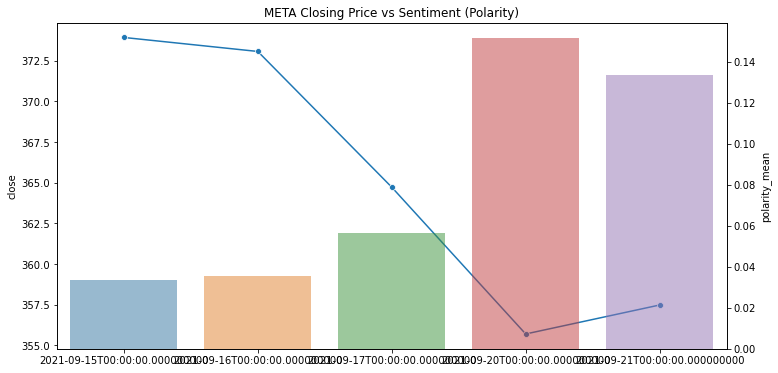

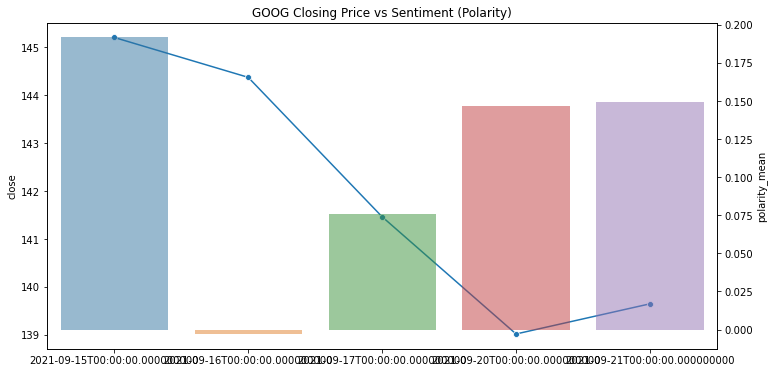

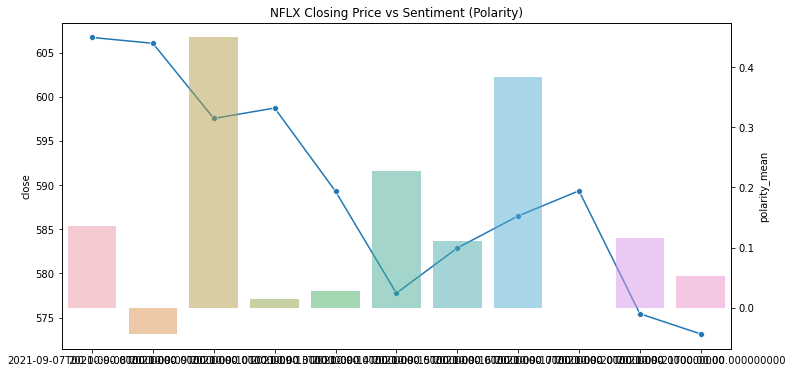

In [29]:
from pandas import read_csv
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df2['date'] = pd.to_datetime(df2['date'])
aapl_stock = read_csv('AAPL.csv')
amzn_stock = read_csv('AMZN.csv')
meta_stock = read_csv('META.csv')
goog_stock = read_csv('GOOG.csv')
nflx_stock = read_csv('NFLX.csv')

aapl_df = df2[df2['ticker'] == 'AAPL']
amzn_df = df2[df2['ticker'] == 'AMZN']
meta_df = df2[df2['ticker'] == 'FB']
goog_df = df2[df2['ticker'] == 'GOOGL']
nflx_df = df2[df2['ticker'] == 'NFLX']

final_aapl = pd.DataFrame()
final_amzn = pd.DataFrame()
final_meta = pd.DataFrame()
final_goog = pd.DataFrame()
final_nflx = pd.DataFrame()
ctr = 0
#AAPL
for idx, data in aapl_stock.iterrows():
    dateFilter = pd.to_datetime(data['Date'], infer_datetime_format=True)
    filteredData = aapl_df[aapl_df['date'].between(dateFilter, dateFilter)]
    if not filteredData.empty:
        filtered_dataframe = pd.DataFrame(data=[[filteredData['polarity'].mean(), filteredData['subjectivity'].mean(), data['Close'], dateFilter]], columns=['polarity_mean', 'subjectivity_mean', 'close', 'date'])
        final_aapl = final_aapl.append(filtered_dataframe)

#AMZN
for idx, data in amzn_stock.iterrows():
    dateFilter = pd.to_datetime(data['Date'], infer_datetime_format=True)
    filteredData = amzn_df[amzn_df['date'].between(dateFilter, dateFilter)]
    if not filteredData.empty:
        filtered_dataframe = pd.DataFrame(data=[[filteredData['polarity'].mean(), filteredData['subjectivity'].mean(), data['Close'], dateFilter]], columns=['polarity_mean', 'subjectivity_mean', 'close', 'date'])
        final_amzn = final_amzn.append(filtered_dataframe)

#META
for idx, data in meta_stock.iterrows():
    dateFilter = pd.to_datetime(data['Date'], infer_datetime_format=True)
    filteredData = meta_df[meta_df['date'].between(dateFilter, dateFilter)]
    if not filteredData.empty:
        filtered_dataframe = pd.DataFrame(data=[[filteredData['polarity'].mean(), filteredData['subjectivity'].mean(), data['Close'], dateFilter]], columns=['polarity_mean', 'subjectivity_mean', 'close', 'date'])
        final_meta = final_meta.append(filtered_dataframe)

#GOOG
for idx, data in goog_stock.iterrows():
    dateFilter = pd.to_datetime(data['Date'], infer_datetime_format=True)
    filteredData = goog_df[goog_df['date'].between(dateFilter, dateFilter)]
    if not filteredData.empty:
        filtered_dataframe = pd.DataFrame(data=[[filteredData['polarity'].mean(), filteredData['subjectivity'].mean(), data['Close'], dateFilter]], columns=['polarity_mean', 'subjectivity_mean', 'close', 'date'])
        final_goog = final_goog.append(filtered_dataframe)

#NFLX
for idx, data in nflx_stock.iterrows():
    dateFilter = pd.to_datetime(data['Date'], infer_datetime_format=True)
    filteredData = nflx_df[nflx_df['date'].between(dateFilter, dateFilter)]
    if not filteredData.empty:
        filtered_dataframe = pd.DataFrame(data=[[filteredData['polarity'].mean(), filteredData['subjectivity'].mean(), data['Close'], dateFilter]], columns=['polarity_mean', 'subjectivity_mean', 'close', 'date'])
        final_nflx = final_nflx.append(filtered_dataframe)


final_aapl = final_aapl.reset_index(drop=True)
final_amzn = final_amzn.reset_index(drop=True)
final_meta = final_meta.reset_index(drop=True)
final_goog = final_goog.reset_index(drop=True)
final_nflx = final_nflx.reset_index(drop=True)

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = final_aapl['close'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = final_aapl, x='date', y='polarity_mean', alpha=0.5, ax=ax2)
plt.title("AAPL Closing Price vs Sentiment (Polarity)")
plt.show()

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = final_amzn['close'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = final_amzn, x='date', y='polarity_mean', alpha=0.5, ax=ax2)
plt.title("AMZN Closing Price vs Sentiment (Polarity)")
plt.show()

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = final_meta['close'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = final_meta, x='date', y='polarity_mean', alpha=0.5, ax=ax2)
plt.title("META Closing Price vs Sentiment (Polarity)")
plt.show()

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = final_goog['close'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = final_goog, x='date', y='polarity_mean', alpha=0.5, ax=ax2)
plt.title("GOOG Closing Price vs Sentiment (Polarity)")
plt.show()

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = final_nflx['close'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = final_nflx, x='date', y='polarity_mean', alpha=0.5, ax=ax2)
plt.title("NFLX Closing Price vs Sentiment (Polarity)")
plt.show()



In [30]:
#group ticker & sentiment
ticker_sentiment = df.groupby(['ticker', 'sentiment']).size().reset_index(name = 'Count')
print(ticker_sentiment)

   ticker sentiment  Count
0    AAPL  Negative     11
1    AAPL   Neutral     57
2    AAPL  Positive     32
3    AMZN  Negative     12
4    AMZN   Neutral     50
5    AMZN  Positive     38
6      FB  Negative     18
7      FB   Neutral     50
8      FB  Positive     32
9   GOOGL  Negative     10
10  GOOGL   Neutral     58
11  GOOGL  Positive     32
12   NFLX  Negative      4
13   NFLX   Neutral     57
14   NFLX  Positive     39


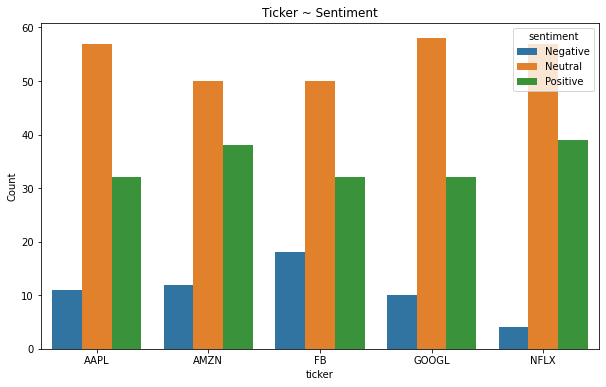

In [31]:
#visualize ticker ~ sentiment
plt.figure(figsize = (10,6))
sns.barplot(x = 'ticker', y = 'Count', hue = 'sentiment', data = ticker_sentiment)
plt.title("Ticker ~ Sentiment")
plt.show()

In [32]:
df

,ticker,clean_headline,subjectivity,polarity,sentiment,score
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,0.0,0.000000,Neutral,"(0.0, 0.0)"
1,FB,UPDATE 1Facebook wraps up deals with Australia...,0.0,0.000000,Neutral,"(0.0, 0.0)"
2,FB,Facebook wraps up deals with Australian media ...,0.0,0.000000,Neutral,"(0.0, 0.0)"
3,FB,Facebook wraps up deals with Australia media f...,0.0,0.000000,Neutral,"(0.0, 0.0)"
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,0.5,0.416667,Positive,"(0.4166666666666667, 0.5)"
...,...,...,...,...,...,...
495,GOOGL,10 Cheap Space Stocks Popular On Reddit,0.8,0.500000,Positive,"(0.5, 0.8)"
496,GOOGL,25 Largest ETFs by Assets Under Management,0.0,0.000000,Neutral,"(0.0, 0.0)"
497,GOOGL,Startup aims to help busy moms with personal a...,0.3,0.050000,Positive,"(0.05, 0.3)"
498,GOOGL,Tech Giants Used Loopholes to Duck Merger Revi...,0.0,0.000000,Neutral,"(0.0, 0.0)"


In [33]:
df = pd.read_csv('combined.csv')
df

,Label,ticker,date,time,headline,close
0,1,FB,22/09/2021,06:30AM,2 Growth Stocks to Buy Hand Over Fist If the M...,357.480011
1,1,FB,22/09/2021,02:23AM,UPDATE 1-Facebook wraps up deals with Australi...,357.480011
2,1,FB,22/09/2021,12:36AM,Facebook wraps up deals with Australian media ...,357.480011
3,1,FB,22/09/2021,12:27AM,Facebook wraps up deals with Australia media f...,357.480011
4,1,FB,21/09/2021,10:34PM,Facebook overpaid FTC fine as quid pro quo to ...,357.480011
...,...,...,...,...,...,...
495,1,GOOGL,15/09/2021,05:25PM,10 Cheap Space Stocks Popular On Reddit,145.205994
496,1,GOOGL,15/09/2021,04:43PM,25 Largest ETFs by Assets Under Management,145.205994
497,1,GOOGL,15/09/2021,04:21PM,Startup aims to help busy moms with personal a...,145.205994
498,1,GOOGL,15/09/2021,03:01PM,Tech Giants Used Loopholes to Duck Merger Revi...,145.205994


In [34]:
df.groupby('ticker').size()

ticker
AAPL     100
AMZN     100
FB       100
GOOGL    100
NFLX     100
dtype: int64

In [35]:
apple = df.loc[(df['ticker'] == 'AAPL')]
apple

,Label,ticker,date,time,headline,close
100,1,AAPL,22/09/2021,06:43AM,Stop using Chinese smartphones over hidden cen...,143.429993
101,1,AAPL,22/09/2021,05:51AM,iOS 15: Flagship SharePlay feature is on its w...,143.429993
102,1,AAPL,22/09/2021,05:01AM,Learn to embrace your digital wallethere are 8...,143.429993
103,1,AAPL,21/09/2021,05:48PM,Epic Won a Small Battle With Apple. Which Tech...,143.429993
104,1,AAPL,21/09/2021,05:40PM,At What Point Does an Individual Stock Become ...,143.429993
...,...,...,...,...,...,...
195,1,AAPL,16/09/2021,05:05PM,Which iPhone 13 should you buy?,148.789993
196,1,AAPL,16/09/2021,04:16PM,Dow Jones Dips As Growth Stocks Surge; Fed Cha...,148.789993
197,1,AAPL,16/09/2021,02:48PM,iPhone 13 Is Already Recording Early Strong Sa...,148.789993
198,1,AAPL,16/09/2021,02:06PM,Altcoins Like Bitcoin Cash and Litecoin Were T...,148.789993


In [36]:
amazon = df.loc[(df['ticker'] == 'AMZN')]
amazon

,Label,ticker,date,time,headline,close
200,0,AMZN,22/09/2021,08:22AM,3 Top Cloud Computing Stocks to Buy Right Now,167.181503
201,0,AMZN,22/09/2021,07:23AM,"Affirm: Buy Now, Get Paid Later?",167.181503
202,0,AMZN,22/09/2021,06:32AM,"Banza, Beyond Meat team up as plant-based meat...",167.181503
203,0,AMZN,22/09/2021,06:00AM,September Sell-Off: Best Stocks to Buy Now,167.181503
204,0,AMZN,22/09/2021,05:51AM,"Got $25,000? These 5 Stocks Can Double Your Mo...",167.181503
...,...,...,...,...,...,...
295,1,AMZN,17/09/2021,09:16AM,Amazon Facing Teamsters Unionization Push in C...,173.126007
296,1,AMZN,17/09/2021,09:06AM,HBO Max slashes prices in limited offer as str...,173.126007
297,1,AMZN,17/09/2021,09:00AM,HBO Max slashes prices in limited offer as str...,173.126007
298,1,AMZN,17/09/2021,07:06AM,Exclusive-Amazon faces Teamsters union drive a...,173.126007


In [37]:
fb = df.loc[(df['ticker'] == 'FB')]
fb

,Label,ticker,date,time,headline,close
0,1,FB,22/09/2021,06:30AM,2 Growth Stocks to Buy Hand Over Fist If the M...,357.480011
1,1,FB,22/09/2021,02:23AM,UPDATE 1-Facebook wraps up deals with Australi...,357.480011
2,1,FB,22/09/2021,12:36AM,Facebook wraps up deals with Australian media ...,357.480011
3,1,FB,22/09/2021,12:27AM,Facebook wraps up deals with Australia media f...,357.480011
4,1,FB,21/09/2021,10:34PM,Facebook overpaid FTC fine as quid pro quo to ...,357.480011
...,...,...,...,...,...,...
95,1,FB,15/09/2021,04:43PM,25 Largest ETFs by Assets Under Management,373.920013
96,1,FB,15/09/2021,03:01PM,Tech Giants Used Loopholes to Duck Merger Revi...,373.920013
97,1,FB,15/09/2021,02:26PM,Facebooks Risks for Young People Add to Bipart...,373.920013
98,1,FB,15/09/2021,01:51PM,When will Amazon stock skyrocket again?,373.920013


In [38]:
google = df.loc[(df['ticker'] == 'GOOGL')]
google

,Label,ticker,date,time,headline,close
400,1,GOOGL,22/09/2021,08:22AM,3 Top Cloud Computing Stocks to Buy Right Now,139.646500
401,1,GOOGL,22/09/2021,07:22AM,"5 Unstoppable Trends to Invest $10,000 in Righ...",139.646500
402,1,GOOGL,22/09/2021,05:01AM,Learn to embrace your digital wallethere are 8...,139.646500
403,1,GOOGL,22/09/2021,12:36AM,Facebook wraps up deals with Australian media ...,139.646500
404,1,GOOGL,22/09/2021,12:27AM,Facebook wraps up deals with Australia media f...,139.646500
...,...,...,...,...,...,...
495,1,GOOGL,15/09/2021,05:25PM,10 Cheap Space Stocks Popular On Reddit,145.205994
496,1,GOOGL,15/09/2021,04:43PM,25 Largest ETFs by Assets Under Management,145.205994
497,1,GOOGL,15/09/2021,04:21PM,Startup aims to help busy moms with personal a...,145.205994
498,1,GOOGL,15/09/2021,03:01PM,Tech Giants Used Loopholes to Duck Merger Revi...,145.205994


In [39]:
netflix = df.loc[(df['ticker'] == 'NFLX')]
netflix

,Label,ticker,date,time,headline,close
300,0,NFLX,22/09/2021,07:07AM,Here's Why Smart Investors Are Buying Netflix ...,573.140015
301,0,NFLX,22/09/2021,06:06AM,Netflix announces deal to buy Roald Dahl Story...,573.140015
302,0,NFLX,22/09/2021,05:38AM,"Matilda, Willy Wonka join Netflix catalog as i...",573.140015
303,0,NFLX,22/09/2021,12:20AM,Philippines lower house approves VAT for big t...,573.140015
304,0,NFLX,21/09/2021,09:47PM,"Hedge Funds Are Buying Netflix, Inc. (NFLX)",573.140015
...,...,...,...,...,...,...
395,1,NFLX,07/09/2021,09:51AM,25 Happiest Countries in the World,606.710022
396,1,NFLX,07/09/2021,08:45AM,Netflix Stock Attracts Big Money,606.710022
397,1,NFLX,07/09/2021,08:27AM,"Five Top Stock Gainers for Tuesday: Match, Spo...",606.710022
398,1,NFLX,07/09/2021,04:40AM,"Best free VPN for secure browsing on PC, iPhon...",606.710022


In [40]:
# resetting index

apple.reset_index(inplace = True)
amazon.reset_index(inplace = True)
fb.reset_index(inplace = True)
google.reset_index(inplace = True)
netflix.reset_index(inplace = True)


### Combining News Headlines as one block feed

In [41]:
#Combine the top news headline:

headline_fb= []

for row  in range (0, len(apple.index)):
    headline_fb.append("".join(str(x) for x in fb.iloc[row, 5]))

headline_fb

['2 Growth Stocks to Buy Hand Over Fist If the Market Crashes',
 'UPDATE 1-Facebook wraps up deals with Australian media firms, TV broadcaster SBS excluded',
 'Facebook wraps up deals with Australian media firms, TV broadcaster SBS excluded',
 'Facebook wraps up deals with Australia media firms, TV broadcaster SBS not included',
 'Facebook overpaid FTC fine as quid pro quo to protect Zuckerberg from liability, shareholders claim',
 'Is GBTC Stock A Good Buy As Bitcoin Slumps After Big Rally?',
 'Facebook Oversight Board to Review Special Rules for High-Profile Users',
 'Facebook says Wall Street Journal report allegations are mischaracterizations',
 'These Are The 5 Best Stocks To Buy And Watch Now',
 'Facebook Questioned by Oversight Board Over Celebrity Rules',
 'UPDATE 1-Facebook Oversight Board seeks clarity on review system for high-profile users',
 'Hedge Funds Have Never Been This Bullish On Facebook Inc (FB)',
 'Facebook Oversight Board seeks clarity on review system for high-p

In [42]:
#Combine the top news headline:

headline_apple= []

for row  in range (0, len(apple.index)):
    headline_apple.append("".join(str(x) for x in apple.iloc[row, 5]))

headline_apple

['Stop using Chinese smartphones over hidden censorship software, consumers warned',
 'iOS 15: Flagship SharePlay feature is on its way, new iPhone update suggests',
 'Learn to embrace your digital wallethere are 8 benefits to love',
 'Epic Won a Small Battle With Apple. Which Tech Giant Will Come Under Fire Next?',
 'At What Point Does an Individual Stock Become Too Big a Percentage of Your Portfolio?',
 'Is Apple Inc. (AAPL) A Good Stock To Buy?',
 'Epic v. Apple could be a legal marathon as appeals wend through system',
 'The iPhone 13 Has Longer Wait Times Than the iPhone 12. What That Means for Apple Stock.',
 'WallStreetBets Stocks, Implied Volatility, Option Volume Create Profit Opportunities',
 'Why Goldman Sachs just launched this ETF that will rival FAANG stocks',
 'Facebook Looks to Carve Out Market for Mobile Video-Chat Device',
 'EU plans to legislate for common phone charger despite Apple grumbles',
 'Apples Latest, Hot IPOs, and the Future of AI',
 'Apple working on tech

In [43]:
#Combine the top news headline:

headline_amazon= []

for row  in range (0, len(apple.index)):
    headline_amazon.append("".join(str(x) for x in amazon.iloc[row, 5]))

headline_amazon

['3 Top Cloud Computing Stocks to Buy Right Now',
 'Affirm: Buy Now, Get Paid Later?',
 'Banza, Beyond Meat team up as plant-based meat makes its way to pizza',
 'September Sell-Off: Best Stocks to Buy Now',
 'Got $25,000? These 5 Stocks Can Double Your Money in 5 Years',
 'Why Matterport Surged 9% Higher Today',
 'Why Helbiz Stock Delivered Scorching Gains to Investors Today',
 'At What Point Does an Individual Stock Become Too Big a Percentage of Your Portfolio?',
 'John, Jenny Paulson to Divorce in Latest Billionaire Split',
 'Why Disney Stock Dropped Today',
 'Minimum wage, but better: These 5 retailers pay the highest hourly rates',
 'FedEx Earnings Miss, Guidance Cut Amid Labor, Supply Chain Woes',
 "Cathie Wood holds these stocks for triple-digit upside  and they're on sale",
 'Amazon, Chobani and other employers vow to hire Afghan refugees in the U.S.',
 'September Sell-Off: These 3 Growth Stocks Just Went on Sale',
 'Amazon.com (AMZN) vs. Tesla and Other Large-Cap Stocks: Hedg

In [44]:
#Combine the top news headline:

headline_netflix= []

for row  in range (0, len(apple.index)):
    headline_netflix.append("".join(str(x) for x in netflix.iloc[row, 5]))

headline_netflix

["Here's Why Smart Investors Are Buying Netflix Stock",
 'Netflix announces deal to buy Roald Dahl Story Company',
 "Matilda, Willy Wonka join Netflix catalog as it buys Roald Dahl's works",
 'Philippines lower house approves VAT for big tech firms',
 'Hedge Funds Are Buying Netflix, Inc. (NFLX)',
 'Netflix plans new versions of Roald Dahl stories with takeover deal',
 "Netflix in talks to buy children's classics author Roald Dahl's works- Bloomberg News",
 'Why Goldman Sachs just launched this ETF that will rival FAANG stocks',
 "Here's Why Investors Can Consider Netflix in the Next Market Crash",
 'Goldman Sachs new ETF targets non-megacap tech stocks around the world',
 'Netflix (NFLX) Wins Big at Emmy Awards 2021 With The Crown',
 "Why ViacomCBS Deserves Apathetic Investors' Attention",
 "Disney Plus Increases Awards Tally at This Year's Emmys",
 'Netflix Launches a Totally Free Streaming Plan, Available Only in Kenya for Now',
 "Emmy Award ratings surprise to the upside, boosted b

In [45]:
#Combine the top news headline:

headline_google= []

for row  in range (0, len(apple.index)):
    headline_google.append("".join(str(x) for x in google.iloc[row, 5]))

headline_google

['3 Top Cloud Computing Stocks to Buy Right Now',
 '5 Unstoppable Trends to Invest $10,000 in Right Now',
 'Learn to embrace your digital wallethere are 8 benefits to love',
 'Facebook wraps up deals with Australian media firms, TV broadcaster SBS excluded',
 'Facebook wraps up deals with Australia media firms, TV broadcaster SBS not included',
 'Philippines lower house approves VAT for big tech firms',
 'Google Drops $2.1 Billion on an Office Building',
 'Why Marin Software Stock Is Trading Higher After-Hours Tuesday',
 'Epic Won a Small Battle With Apple. Which Tech Giant Will Come Under Fire Next?',
 'At What Point Does an Individual Stock Become Too Big a Percentage of Your Portfolio?',
 'These Are The Best Robinhood Stocks To Buy Or Watch Now',
 '5 at 5: Your Daily Digest for Real Estate Investing, 9/21/21',
 'Hedge Funds Have Never Been This Bullish On Alphabet Inc (GOOGL)',
 'Epic v. Apple could be a legal marathon as appeals wend through system',
 'UPDATE 1-Google to buy more o

### Data Cleaning

In [46]:
# clean the data:
clean_headline_facebook = []

# Removing breaks and slashes
for i in range (0, len(headline_fb)):
    clean_headline_facebook.append(re.sub("b[(')]", '', headline_fb[i])) # remove b'
    clean_headline_facebook[i] = re.sub('b[(")]', '', headline_fb[i]) # remove b"
    clean_headline_facebook[i] = re.sub("\'", '', headline_fb[i]) # remove \'

clean_headline_facebook[0]

'2 Growth Stocks to Buy Hand Over Fist If the Market Crashes'

In [47]:
# clean the data:
clean_headline_apple = []

# Removing breaks and slashes
for i in range (0, len(headline_fb)):
    clean_headline_apple.append(re.sub("b[(')]", '', headline_apple[i])) # remove b'
    clean_headline_apple[i] = re.sub('b[(")]', '', headline_apple[i]) # remove b"
    clean_headline_apple[i] = re.sub("\'", '', headline_apple[i]) # remove \'

clean_headline_apple[0]

'Stop using Chinese smartphones over hidden censorship software, consumers warned'

In [48]:
# clean the data:
clean_headline_amazon = []

# Removing breaks and slashes
for i in range (0, len(headline_fb)):
    clean_headline_amazon.append(re.sub("b[(')]", '', headline_amazon[i])) # remove b'
    clean_headline_amazon[i] = re.sub('b[(")]', '', headline_amazon[i]) # remove b"
    clean_headline_amazon[i] = re.sub("\'", '', headline_amazon[i]) # remove \'

clean_headline_amazon[0]

'3 Top Cloud Computing Stocks to Buy Right Now'

In [49]:
# clean the data:
clean_headline_netflix = []

# Removing breaks and slashes
for i in range (0, len(headline_fb)):
    clean_headline_netflix.append(re.sub("b[(')]", '', headline_netflix[i])) # remove b'
    clean_headline_netflix[i] = re.sub('b[(")]', '', headline_netflix[i]) # remove b"
    clean_headline_netflix[i] = re.sub("\'", '', headline_netflix[i]) # remove \'

clean_headline_netflix[0]

'Heres Why Smart Investors Are Buying Netflix Stock'

In [50]:
# clean the data:
clean_headline_google = []

# Removing breaks and slashes
for i in range (0, len(headline_fb)):
    clean_headline_google.append(re.sub("b[(')]", '', headline_google[i])) # remove b'
    clean_headline_google[i] = re.sub('b[(")]', '', headline_google[i]) # remove b"
    clean_headline_google[i] = re.sub("\'", '', headline_google[i]) # remove \'

clean_headline_google[0]

'3 Top Cloud Computing Stocks to Buy Right Now'

### Data after Cleaning

In [51]:
# Add the clean headline to the merge data:

fb['clean_headline'] = clean_headline_facebook

fb

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/2590944952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['clean_headline'] = clean_headline_facebook


,index,Label,ticker,date,time,headline,close,clean_headline
0,0,1,FB,22/09/2021,06:30AM,2 Growth Stocks to Buy Hand Over Fist If the M...,357.480011,2 Growth Stocks to Buy Hand Over Fist If the M...
1,1,1,FB,22/09/2021,02:23AM,UPDATE 1-Facebook wraps up deals with Australi...,357.480011,UPDATE 1-Facebook wraps up deals with Australi...
2,2,1,FB,22/09/2021,12:36AM,Facebook wraps up deals with Australian media ...,357.480011,Facebook wraps up deals with Australian media ...
3,3,1,FB,22/09/2021,12:27AM,Facebook wraps up deals with Australia media f...,357.480011,Facebook wraps up deals with Australia media f...
4,4,1,FB,21/09/2021,10:34PM,Facebook overpaid FTC fine as quid pro quo to ...,357.480011,Facebook overpaid FTC fine as quid pro quo to ...
...,...,...,...,...,...,...,...,...
95,95,1,FB,15/09/2021,04:43PM,25 Largest ETFs by Assets Under Management,373.920013,25 Largest ETFs by Assets Under Management
96,96,1,FB,15/09/2021,03:01PM,Tech Giants Used Loopholes to Duck Merger Revi...,373.920013,Tech Giants Used Loopholes to Duck Merger Revi...
97,97,1,FB,15/09/2021,02:26PM,Facebooks Risks for Young People Add to Bipart...,373.920013,Facebooks Risks for Young People Add to Bipart...
98,98,1,FB,15/09/2021,01:51PM,When will Amazon stock skyrocket again?,373.920013,When will Amazon stock skyrocket again?


In [52]:
# Add the clean headline to the merge data:

apple['clean_headline'] = clean_headline_apple

apple

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/1743345118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['clean_headline'] = clean_headline_apple


,index,Label,ticker,date,time,headline,close,clean_headline
0,100,1,AAPL,22/09/2021,06:43AM,Stop using Chinese smartphones over hidden cen...,143.429993,Stop using Chinese smartphones over hidden cen...
1,101,1,AAPL,22/09/2021,05:51AM,iOS 15: Flagship SharePlay feature is on its w...,143.429993,iOS 15: Flagship SharePlay feature is on its w...
2,102,1,AAPL,22/09/2021,05:01AM,Learn to embrace your digital wallethere are 8...,143.429993,Learn to embrace your digital wallethere are 8...
3,103,1,AAPL,21/09/2021,05:48PM,Epic Won a Small Battle With Apple. Which Tech...,143.429993,Epic Won a Small Battle With Apple. Which Tech...
4,104,1,AAPL,21/09/2021,05:40PM,At What Point Does an Individual Stock Become ...,143.429993,At What Point Does an Individual Stock Become ...
...,...,...,...,...,...,...,...,...
95,195,1,AAPL,16/09/2021,05:05PM,Which iPhone 13 should you buy?,148.789993,Which iPhone 13 should you buy?
96,196,1,AAPL,16/09/2021,04:16PM,Dow Jones Dips As Growth Stocks Surge; Fed Cha...,148.789993,Dow Jones Dips As Growth Stocks Surge; Fed Cha...
97,197,1,AAPL,16/09/2021,02:48PM,iPhone 13 Is Already Recording Early Strong Sa...,148.789993,iPhone 13 Is Already Recording Early Strong Sa...
98,198,1,AAPL,16/09/2021,02:06PM,Altcoins Like Bitcoin Cash and Litecoin Were T...,148.789993,Altcoins Like Bitcoin Cash and Litecoin Were T...


In [53]:
# Add the clean headline to the merge data:

amazon['clean_headline'] = clean_headline_amazon

amazon

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/3746168829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['clean_headline'] = clean_headline_amazon


,index,Label,ticker,date,time,headline,close,clean_headline
0,200,0,AMZN,22/09/2021,08:22AM,3 Top Cloud Computing Stocks to Buy Right Now,167.181503,3 Top Cloud Computing Stocks to Buy Right Now
1,201,0,AMZN,22/09/2021,07:23AM,"Affirm: Buy Now, Get Paid Later?",167.181503,"Affirm: Buy Now, Get Paid Later?"
2,202,0,AMZN,22/09/2021,06:32AM,"Banza, Beyond Meat team up as plant-based meat...",167.181503,"Banza, Beyond Meat team up as plant-based meat..."
3,203,0,AMZN,22/09/2021,06:00AM,September Sell-Off: Best Stocks to Buy Now,167.181503,September Sell-Off: Best Stocks to Buy Now
4,204,0,AMZN,22/09/2021,05:51AM,"Got $25,000? These 5 Stocks Can Double Your Mo...",167.181503,"Got $25,000? These 5 Stocks Can Double Your Mo..."
...,...,...,...,...,...,...,...,...
95,295,1,AMZN,17/09/2021,09:16AM,Amazon Facing Teamsters Unionization Push in C...,173.126007,Amazon Facing Teamsters Unionization Push in C...
96,296,1,AMZN,17/09/2021,09:06AM,HBO Max slashes prices in limited offer as str...,173.126007,HBO Max slashes prices in limited offer as str...
97,297,1,AMZN,17/09/2021,09:00AM,HBO Max slashes prices in limited offer as str...,173.126007,HBO Max slashes prices in limited offer as str...
98,298,1,AMZN,17/09/2021,07:06AM,Exclusive-Amazon faces Teamsters union drive a...,173.126007,Exclusive-Amazon faces Teamsters union drive a...


In [54]:
# Add the clean headline to the merge data:

netflix['clean_headline'] = clean_headline_netflix

netflix

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/3586328422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['clean_headline'] = clean_headline_netflix


,index,Label,ticker,date,time,headline,close,clean_headline
0,300,0,NFLX,22/09/2021,07:07AM,Here's Why Smart Investors Are Buying Netflix ...,573.140015,Heres Why Smart Investors Are Buying Netflix S...
1,301,0,NFLX,22/09/2021,06:06AM,Netflix announces deal to buy Roald Dahl Story...,573.140015,Netflix announces deal to buy Roald Dahl Story...
2,302,0,NFLX,22/09/2021,05:38AM,"Matilda, Willy Wonka join Netflix catalog as i...",573.140015,"Matilda, Willy Wonka join Netflix catalog as i..."
3,303,0,NFLX,22/09/2021,12:20AM,Philippines lower house approves VAT for big t...,573.140015,Philippines lower house approves VAT for big t...
4,304,0,NFLX,21/09/2021,09:47PM,"Hedge Funds Are Buying Netflix, Inc. (NFLX)",573.140015,"Hedge Funds Are Buying Netflix, Inc. (NFLX)"
...,...,...,...,...,...,...,...,...
95,395,1,NFLX,07/09/2021,09:51AM,25 Happiest Countries in the World,606.710022,25 Happiest Countries in the World
96,396,1,NFLX,07/09/2021,08:45AM,Netflix Stock Attracts Big Money,606.710022,Netflix Stock Attracts Big Money
97,397,1,NFLX,07/09/2021,08:27AM,"Five Top Stock Gainers for Tuesday: Match, Spo...",606.710022,"Five Top Stock Gainers for Tuesday: Match, Spo..."
98,398,1,NFLX,07/09/2021,04:40AM,"Best free VPN for secure browsing on PC, iPhon...",606.710022,"Best free VPN for secure browsing on PC, iPhon..."


In [55]:
# Add the clean headline to the merge data:

google['clean_headline'] = clean_headline_google

google

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/2315553979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['clean_headline'] = clean_headline_google


,index,Label,ticker,date,time,headline,close,clean_headline
0,400,1,GOOGL,22/09/2021,08:22AM,3 Top Cloud Computing Stocks to Buy Right Now,139.646500,3 Top Cloud Computing Stocks to Buy Right Now
1,401,1,GOOGL,22/09/2021,07:22AM,"5 Unstoppable Trends to Invest $10,000 in Righ...",139.646500,"5 Unstoppable Trends to Invest $10,000 in Righ..."
2,402,1,GOOGL,22/09/2021,05:01AM,Learn to embrace your digital wallethere are 8...,139.646500,Learn to embrace your digital wallethere are 8...
3,403,1,GOOGL,22/09/2021,12:36AM,Facebook wraps up deals with Australian media ...,139.646500,Facebook wraps up deals with Australian media ...
4,404,1,GOOGL,22/09/2021,12:27AM,Facebook wraps up deals with Australia media f...,139.646500,Facebook wraps up deals with Australia media f...
...,...,...,...,...,...,...,...,...
95,495,1,GOOGL,15/09/2021,05:25PM,10 Cheap Space Stocks Popular On Reddit,145.205994,10 Cheap Space Stocks Popular On Reddit
96,496,1,GOOGL,15/09/2021,04:43PM,25 Largest ETFs by Assets Under Management,145.205994,25 Largest ETFs by Assets Under Management
97,497,1,GOOGL,15/09/2021,04:21PM,Startup aims to help busy moms with personal a...,145.205994,Startup aims to help busy moms with personal a...
98,498,1,GOOGL,15/09/2021,03:01PM,Tech Giants Used Loopholes to Duck Merger Revi...,145.205994,Tech Giants Used Loopholes to Duck Merger Revi...


### Subjectivity and Polarity

In [56]:
# get subjectivity:

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# get polarity:

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [57]:
fb['Subjectivity'] = fb['headline'].apply(get_subjectivity)

fb['Polarity'] = fb['headline'].apply(get_polarity)

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/1797153430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['Subjectivity'] = fb['headline'].apply(get_subjectivity)
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/1797153430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['Polarity'] = fb['headline'].apply(get_polarity)


In [58]:
apple['Subjectivity'] = apple['headline'].apply(get_subjectivity)

apple['Polarity'] = apple['headline'].apply(get_polarity)

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/3162237021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Subjectivity'] = apple['headline'].apply(get_subjectivity)
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/3162237021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Polarity'] = apple['headline'].apply(get_polarity)


In [59]:
amazon['Subjectivity'] = amazon['headline'].apply(get_subjectivity)

amazon['Polarity'] = amazon['headline'].apply(get_polarity)

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/1697690322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['Subjectivity'] = amazon['headline'].apply(get_subjectivity)
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/1697690322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['Polarity'] = amazon['headline'].apply(get_polarity)


In [60]:
netflix['Subjectivity'] = netflix['headline'].apply(get_subjectivity)

netflix['Polarity'] = netflix['headline'].apply(get_polarity)

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/1253348615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['Subjectivity'] = netflix['headline'].apply(get_subjectivity)
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/1253348615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['Polarity'] = netflix['headline'].apply(get_polarity)


In [61]:
google['Subjectivity'] = google['headline'].apply(get_subjectivity)

google['Polarity'] = google['headline'].apply(get_polarity)

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/2555884920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['Subjectivity'] = google['headline'].apply(get_subjectivity)
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/2555884920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['Polarity'] = google['headline'].apply(get_polarity)


# Sentiment scores using SentimentIntensityAnalyzer

In [62]:
# create function to get the sentiment score:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

#### Facebook

In [63]:
# get Sentiment score for each day:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(fb['clean_headline'])):
    SIA= getSIA(fb['clean_headline'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])
    

In [64]:
fb['compound']= compound
fb['neg']= neg
fb['pos']=pos
fb['neu']=neu

fb

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/51372496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['compound']= compound
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/51372496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['neg']= neg
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/51372496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,index,Label,ticker,date,time,headline,close,clean_headline,Subjectivity,Polarity,compound,neg,pos,neu
0,0,1,FB,22/09/2021,06:30AM,2 Growth Stocks to Buy Hand Over Fist If the M...,357.480011,2 Growth Stocks to Buy Hand Over Fist If the M...,0.0,0.000000,0.7003,0.000,0.367,0.633
1,1,1,FB,22/09/2021,02:23AM,UPDATE 1-Facebook wraps up deals with Australi...,357.480011,UPDATE 1-Facebook wraps up deals with Australi...,0.0,0.000000,-0.3400,0.167,0.000,0.833
2,2,1,FB,22/09/2021,12:36AM,Facebook wraps up deals with Australian media ...,357.480011,Facebook wraps up deals with Australian media ...,0.0,0.000000,-0.3400,0.179,0.000,0.821
3,3,1,FB,22/09/2021,12:27AM,Facebook wraps up deals with Australia media f...,357.480011,Facebook wraps up deals with Australia media f...,0.0,0.000000,0.0000,0.000,0.000,1.000
4,4,1,FB,21/09/2021,10:34PM,Facebook overpaid FTC fine as quid pro quo to ...,357.480011,Facebook overpaid FTC fine as quid pro quo to ...,0.5,0.416667,0.3818,0.099,0.242,0.659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1,FB,15/09/2021,04:43PM,25 Largest ETFs by Assets Under Management,373.920013,25 Largest ETFs by Assets Under Management,0.0,0.000000,0.1779,0.000,0.221,0.779
96,96,1,FB,15/09/2021,03:01PM,Tech Giants Used Loopholes to Duck Merger Revi...,373.920013,Tech Giants Used Loopholes to Duck Merger Revi...,0.0,0.000000,0.0000,0.000,0.000,1.000
97,97,1,FB,15/09/2021,02:26PM,Facebooks Risks for Young People Add to Bipart...,373.920013,Facebooks Risks for Young People Add to Bipart...,0.4,0.100000,-0.2732,0.208,0.000,0.792
98,98,1,FB,15/09/2021,01:51PM,When will Amazon stock skyrocket again?,373.920013,When will Amazon stock skyrocket again?,0.0,0.000000,0.1779,0.000,0.254,0.746


In [65]:
#Create new dataframe contain relevants features:

df_fb= fb[['Label', 'close', 'Subjectivity','Polarity','compound','neg','pos', 'neu']]
df_fb

,Label,close,Subjectivity,Polarity,compound,neg,pos,neu
0,1,357.480011,0.0,0.000000,0.7003,0.000,0.367,0.633
1,1,357.480011,0.0,0.000000,-0.3400,0.167,0.000,0.833
2,1,357.480011,0.0,0.000000,-0.3400,0.179,0.000,0.821
3,1,357.480011,0.0,0.000000,0.0000,0.000,0.000,1.000
4,1,357.480011,0.5,0.416667,0.3818,0.099,0.242,0.659
...,...,...,...,...,...,...,...,...
95,1,373.920013,0.0,0.000000,0.1779,0.000,0.221,0.779
96,1,373.920013,0.0,0.000000,0.0000,0.000,0.000,1.000
97,1,373.920013,0.4,0.100000,-0.2732,0.208,0.000,0.792
98,1,373.920013,0.0,0.000000,0.1779,0.000,0.254,0.746


#### Apple

In [66]:
# get Sentiment score for each day:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(apple['clean_headline'])):
    SIA= getSIA(apple['clean_headline'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])
    

In [67]:
apple['compound']= compound
apple['neg']= neg
apple['pos']=pos
apple['neu']=neu

apple

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/4130477775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['compound']= compound
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/4130477775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['neg']= neg
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/4130477775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,index,Label,ticker,date,time,headline,close,clean_headline,Subjectivity,Polarity,compound,neg,pos,neu
0,100,1,AAPL,22/09/2021,06:43AM,Stop using Chinese smartphones over hidden cen...,143.429993,Stop using Chinese smartphones over hidden cen...,0.166667,-0.083333,-0.5106,0.350,0.000,0.650
1,101,1,AAPL,22/09/2021,05:51AM,iOS 15: Flagship SharePlay feature is on its w...,143.429993,iOS 15: Flagship SharePlay feature is on its w...,0.454545,0.136364,0.1027,0.000,0.104,0.896
2,102,1,AAPL,22/09/2021,05:01AM,Learn to embrace your digital wallethere are 8...,143.429993,Learn to embrace your digital wallethere are 8...,0.300000,0.250000,0.8442,0.000,0.532,0.468
3,103,1,AAPL,21/09/2021,05:48PM,Epic Won a Small Battle With Apple. Which Tech...,143.429993,Epic Won a Small Battle With Apple. Which Tech...,0.450000,-0.037500,-0.0772,0.242,0.179,0.580
4,104,1,AAPL,21/09/2021,05:40PM,At What Point Does an Individual Stock Become ...,143.429993,At What Point Does an Individual Stock Become ...,0.250000,0.000000,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,195,1,AAPL,16/09/2021,05:05PM,Which iPhone 13 should you buy?,148.789993,Which iPhone 13 should you buy?,0.000000,0.000000,0.0000,0.000,0.000,1.000
96,196,1,AAPL,16/09/2021,04:16PM,Dow Jones Dips As Growth Stocks Surge; Fed Cha...,148.789993,Dow Jones Dips As Growth Stocks Surge; Fed Cha...,0.000000,0.000000,0.3818,0.000,0.133,0.867
97,197,1,AAPL,16/09/2021,02:48PM,iPhone 13 Is Already Recording Early Strong Sa...,148.789993,iPhone 13 Is Already Recording Early Strong Sa...,0.516667,0.266667,0.5106,0.000,0.268,0.732
98,198,1,AAPL,16/09/2021,02:06PM,Altcoins Like Bitcoin Cash and Litecoin Were T...,148.789993,Altcoins Like Bitcoin Cash and Litecoin Were T...,0.000000,0.000000,0.3612,0.000,0.161,0.839


In [68]:
#Create new dataframe contain relevants features:

df_apple= apple[['Label', 'close', 'Subjectivity','Polarity','compound','neg','pos', 'neu']]
df_apple

,Label,close,Subjectivity,Polarity,compound,neg,pos,neu
0,1,143.429993,0.166667,-0.083333,-0.5106,0.350,0.000,0.650
1,1,143.429993,0.454545,0.136364,0.1027,0.000,0.104,0.896
2,1,143.429993,0.300000,0.250000,0.8442,0.000,0.532,0.468
3,1,143.429993,0.450000,-0.037500,-0.0772,0.242,0.179,0.580
4,1,143.429993,0.250000,0.000000,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...
95,1,148.789993,0.000000,0.000000,0.0000,0.000,0.000,1.000
96,1,148.789993,0.000000,0.000000,0.3818,0.000,0.133,0.867
97,1,148.789993,0.516667,0.266667,0.5106,0.000,0.268,0.732
98,1,148.789993,0.000000,0.000000,0.3612,0.000,0.161,0.839


#### Amazon

In [69]:
# get Sentiment score for each day:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(amazon['clean_headline'])):
    SIA= getSIA(amazon['clean_headline'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])
    

In [70]:
amazon['compound']= compound
amazon['neg']= neg
amazon['pos']=pos
amazon['neu']=neu

amazon

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/4047215921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['compound']= compound
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/4047215921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['neg']= neg
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/4047215921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,index,Label,ticker,date,time,headline,close,clean_headline,Subjectivity,Polarity,compound,neg,pos,neu
0,200,0,AMZN,22/09/2021,08:22AM,3 Top Cloud Computing Stocks to Buy Right Now,167.181503,3 Top Cloud Computing Stocks to Buy Right Now,0.517857,0.392857,0.2023,0.000,0.184,0.816
1,201,0,AMZN,22/09/2021,07:23AM,"Affirm: Buy Now, Get Paid Later?",167.181503,"Affirm: Buy Now, Get Paid Later?",0.000000,0.000000,0.0000,0.000,0.000,1.000
2,202,0,AMZN,22/09/2021,06:32AM,"Banza, Beyond Meat team up as plant-based meat...",167.181503,"Banza, Beyond Meat team up as plant-based meat...",0.000000,0.000000,0.0000,0.000,0.000,1.000
3,203,0,AMZN,22/09/2021,06:00AM,September Sell-Off: Best Stocks to Buy Now,167.181503,September Sell-Off: Best Stocks to Buy Now,0.300000,1.000000,0.6369,0.000,0.412,0.588
4,204,0,AMZN,22/09/2021,05:51AM,"Got $25,000? These 5 Stocks Can Double Your Mo...",167.181503,"Got $25,000? These 5 Stocks Can Double Your Mo...",0.000000,0.000000,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,295,1,AMZN,17/09/2021,09:16AM,Amazon Facing Teamsters Unionization Push in C...,173.126007,Amazon Facing Teamsters Unionization Push in C...,0.000000,0.000000,0.1779,0.000,0.221,0.779
96,296,1,AMZN,17/09/2021,09:06AM,HBO Max slashes prices in limited offer as str...,173.126007,HBO Max slashes prices in limited offer as str...,0.142857,-0.071429,-0.7430,0.448,0.000,0.552
97,297,1,AMZN,17/09/2021,09:00AM,HBO Max slashes prices in limited offer as str...,173.126007,HBO Max slashes prices in limited offer as str...,0.142857,-0.071429,-0.7430,0.448,0.000,0.552
98,298,1,AMZN,17/09/2021,07:06AM,Exclusive-Amazon faces Teamsters union drive a...,173.126007,Exclusive-Amazon faces Teamsters union drive a...,0.000000,0.000000,0.0000,0.000,0.000,1.000


In [71]:
#Create new dataframe contain relevants features:

df_amazon= amazon[['Label', 'close', 'Subjectivity','Polarity','compound','neg','pos', 'neu']]
df_amazon

,Label,close,Subjectivity,Polarity,compound,neg,pos,neu
0,0,167.181503,0.517857,0.392857,0.2023,0.000,0.184,0.816
1,0,167.181503,0.000000,0.000000,0.0000,0.000,0.000,1.000
2,0,167.181503,0.000000,0.000000,0.0000,0.000,0.000,1.000
3,0,167.181503,0.300000,1.000000,0.6369,0.000,0.412,0.588
4,0,167.181503,0.000000,0.000000,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...
95,1,173.126007,0.000000,0.000000,0.1779,0.000,0.221,0.779
96,1,173.126007,0.142857,-0.071429,-0.7430,0.448,0.000,0.552
97,1,173.126007,0.142857,-0.071429,-0.7430,0.448,0.000,0.552
98,1,173.126007,0.000000,0.000000,0.0000,0.000,0.000,1.000


#### Netflix

In [72]:
# get Sentiment score for each day:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(netflix['clean_headline'])):
    SIA= getSIA(netflix['clean_headline'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])
    

In [73]:
netflix['compound']= compound
netflix['neg']= neg
netflix['pos']=pos
netflix['neu']=neu

netflix

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/2381254673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['compound']= compound
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/2381254673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['neg']= neg
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/2381254673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,index,Label,ticker,date,time,headline,close,clean_headline,Subjectivity,Polarity,compound,neg,pos,neu
0,300,0,NFLX,22/09/2021,07:07AM,Here's Why Smart Investors Are Buying Netflix ...,573.140015,Heres Why Smart Investors Are Buying Netflix S...,0.642857,0.214286,0.4019,0.000,0.278,0.722
1,301,0,NFLX,22/09/2021,06:06AM,Netflix announces deal to buy Roald Dahl Story...,573.140015,Netflix announces deal to buy Roald Dahl Story...,0.000000,0.000000,0.0000,0.000,0.000,1.000
2,302,0,NFLX,22/09/2021,05:38AM,"Matilda, Willy Wonka join Netflix catalog as i...",573.140015,"Matilda, Willy Wonka join Netflix catalog as i...",0.000000,0.000000,0.2960,0.000,0.167,0.833
3,303,0,NFLX,22/09/2021,12:20AM,Philippines lower house approves VAT for big t...,573.140015,Philippines lower house approves VAT for big t...,0.100000,0.000000,0.1280,0.185,0.227,0.588
4,304,0,NFLX,21/09/2021,09:47PM,"Hedge Funds Are Buying Netflix, Inc. (NFLX)",573.140015,"Hedge Funds Are Buying Netflix, Inc. (NFLX)",0.000000,0.000000,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,395,1,NFLX,07/09/2021,09:51AM,25 Happiest Countries in the World,606.710022,25 Happiest Countries in the World,0.000000,0.000000,0.6369,0.000,0.457,0.543
96,396,1,NFLX,07/09/2021,08:45AM,Netflix Stock Attracts Big Money,606.710022,Netflix Stock Attracts Big Money,0.100000,0.000000,0.4019,0.000,0.403,0.597
97,397,1,NFLX,07/09/2021,08:27AM,"Five Top Stock Gainers for Tuesday: Match, Spo...",606.710022,"Five Top Stock Gainers for Tuesday: Match, Spo...",0.500000,0.500000,0.2023,0.000,0.184,0.816
98,398,1,NFLX,07/09/2021,04:40AM,"Best free VPN for secure browsing on PC, iPhon...",606.710022,"Best free VPN for secure browsing on PC, iPhon...",0.550000,0.575000,0.8176,0.108,0.444,0.448


In [74]:
#Create new dataframe contain relevants features:

df_netflix= netflix[['Label', 'close', 'Subjectivity','Polarity','compound','neg','pos', 'neu']]
df_netflix

,Label,close,Subjectivity,Polarity,compound,neg,pos,neu
0,0,573.140015,0.642857,0.214286,0.4019,0.000,0.278,0.722
1,0,573.140015,0.000000,0.000000,0.0000,0.000,0.000,1.000
2,0,573.140015,0.000000,0.000000,0.2960,0.000,0.167,0.833
3,0,573.140015,0.100000,0.000000,0.1280,0.185,0.227,0.588
4,0,573.140015,0.000000,0.000000,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...
95,1,606.710022,0.000000,0.000000,0.6369,0.000,0.457,0.543
96,1,606.710022,0.100000,0.000000,0.4019,0.000,0.403,0.597
97,1,606.710022,0.500000,0.500000,0.2023,0.000,0.184,0.816
98,1,606.710022,0.550000,0.575000,0.8176,0.108,0.444,0.448


#### Google

In [75]:
# get Sentiment score for each day:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(google['clean_headline'])):
    SIA= getSIA(google['clean_headline'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])
    

In [76]:
google['compound']= compound
google['neg']= neg
google['pos']=pos
google['neu']=neu

google

C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/981764881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['compound']= compound
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/981764881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['neg']= neg
C:\Users\Zeraphim\AppData\Local\Temp/ipykernel_29292/981764881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,index,Label,ticker,date,time,headline,close,clean_headline,Subjectivity,Polarity,compound,neg,pos,neu
0,400,1,GOOGL,22/09/2021,08:22AM,3 Top Cloud Computing Stocks to Buy Right Now,139.646500,3 Top Cloud Computing Stocks to Buy Right Now,0.517857,0.392857,0.2023,0.000,0.184,0.816
1,401,1,GOOGL,22/09/2021,07:22AM,"5 Unstoppable Trends to Invest $10,000 in Righ...",139.646500,"5 Unstoppable Trends to Invest $10,000 in Righ...",0.535714,0.285714,-0.2023,0.184,0.000,0.816
2,402,1,GOOGL,22/09/2021,05:01AM,Learn to embrace your digital wallethere are 8...,139.646500,Learn to embrace your digital wallethere are 8...,0.300000,0.250000,0.8442,0.000,0.532,0.468
3,403,1,GOOGL,22/09/2021,12:36AM,Facebook wraps up deals with Australian media ...,139.646500,Facebook wraps up deals with Australian media ...,0.000000,0.000000,-0.3400,0.179,0.000,0.821
4,404,1,GOOGL,22/09/2021,12:27AM,Facebook wraps up deals with Australia media f...,139.646500,Facebook wraps up deals with Australia media f...,0.000000,0.000000,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,495,1,GOOGL,15/09/2021,05:25PM,10 Cheap Space Stocks Popular On Reddit,145.205994,10 Cheap Space Stocks Popular On Reddit,0.800000,0.500000,0.4215,0.000,0.318,0.682
96,496,1,GOOGL,15/09/2021,04:43PM,25 Largest ETFs by Assets Under Management,145.205994,25 Largest ETFs by Assets Under Management,0.000000,0.000000,0.1779,0.000,0.221,0.779
97,497,1,GOOGL,15/09/2021,04:21PM,Startup aims to help busy moms with personal a...,145.205994,Startup aims to help busy moms with personal a...,0.300000,0.050000,0.4019,0.000,0.231,0.769
98,498,1,GOOGL,15/09/2021,03:01PM,Tech Giants Used Loopholes to Duck Merger Revi...,145.205994,Tech Giants Used Loopholes to Duck Merger Revi...,0.000000,0.000000,0.0000,0.000,0.000,1.000


In [77]:
#Create new dataframe contain relevants features:

df_google= google[['Label', 'close', 'Subjectivity','Polarity','compound','neg','pos', 'neu']]
df_google

,Label,close,Subjectivity,Polarity,compound,neg,pos,neu
0,1,139.646500,0.517857,0.392857,0.2023,0.000,0.184,0.816
1,1,139.646500,0.535714,0.285714,-0.2023,0.184,0.000,0.816
2,1,139.646500,0.300000,0.250000,0.8442,0.000,0.532,0.468
3,1,139.646500,0.000000,0.000000,-0.3400,0.179,0.000,0.821
4,1,139.646500,0.000000,0.000000,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...
95,1,145.205994,0.800000,0.500000,0.4215,0.000,0.318,0.682
96,1,145.205994,0.000000,0.000000,0.1779,0.000,0.221,0.779
97,1,145.205994,0.300000,0.050000,0.4019,0.000,0.231,0.769
98,1,145.205994,0.000000,0.000000,0.0000,0.000,0.000,1.000


### Linear Discriminant Analysis Model

#### Facebook

In [78]:
#create the feature data set:
X=df_fb

X=np.array(X.drop(['Label'],1))

In [79]:
#create the target data set:

y= np.array(df_fb['Label'])

In [80]:
# Split the data:

x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 0, stratify=y)

In [81]:
#create and train the model:
model_fb= LinearDiscriminantAnalysis().fit(x_train, y_train)

# Model predicton:

predict= model_fb.predict(x_test)
predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [82]:
acc_fb = round(model_fb.score(x_train, y_train) * 100, 2)
accuracy_fb=round(accuracy_score(y_test,predict)* 100, 2)

cm = confusion_matrix(y_test, predict)
accuracy = accuracy_score(y_test,predict)
precision =precision_score(y_test, predict,average='micro')
recall =  recall_score(y_test, predict,average='micro')
f1 = f1_score(y_test,predict,average='micro')

In [83]:
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[ 0  7]
 [ 2 11]]
accuracy_DecisionTree: 0.550
precision_DecisionTree: 0.550
recall_DecisionTree: 0.550
f1-score_DecisionTree : 0.550


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

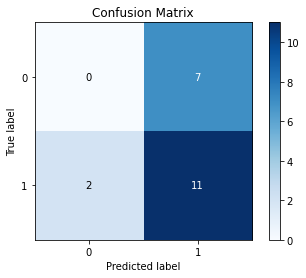

In [84]:
# Confusion Matrix
plot_confusion_matrix(y_test,predict)

In [85]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.61      0.85      0.71        13

    accuracy                           0.55        20
   macro avg       0.31      0.42      0.35        20
weighted avg       0.40      0.55      0.46        20



#### Apple

In [86]:
#create the feature data set:
X=df_apple

X=np.array(X.drop(['Label'],1))

In [87]:
#create the target data set:

y= np.array(df_apple['Label'])

In [88]:
# Split the data:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 0, stratify=y)

In [89]:
#create and train the model:
model_apple= LinearDiscriminantAnalysis().fit(x_train, y_train)

# Model predicton:

predict= model_apple.predict(x_test)
predict

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [90]:
acc_apple = round(model_apple.score(x_train, y_train) * 100, 2)
accuracy_apple=round(accuracy_score(y_test,predict)* 100, 2)


cm = confusion_matrix(y_test, predict)
accuracy = accuracy_score(y_test,predict)
precision =precision_score(y_test, predict,average='micro')
recall =  recall_score(y_test, predict,average='micro')
f1 = f1_score(y_test,predict,average='micro')

In [91]:
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[ 5  1]
 [ 1 13]]
accuracy_DecisionTree: 0.900
precision_DecisionTree: 0.900
recall_DecisionTree: 0.900
f1-score_DecisionTree : 0.900


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

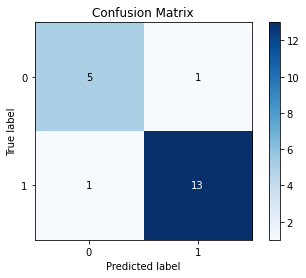

In [92]:
# Confusion Matrix
plot_confusion_matrix(y_test,predict)

In [93]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.93      0.93      0.93        14

    accuracy                           0.90        20
   macro avg       0.88      0.88      0.88        20
weighted avg       0.90      0.90      0.90        20



#### Amazon

In [94]:
#create the feature data set:
X=df_amazon

X=np.array(X.drop(['Label'],1))

In [95]:
#create the target data set:

y= np.array(df_amazon['Label'])

In [96]:
# Split the data:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 0, stratify=y)

In [97]:
#create and train the model:
model_amazon= LinearDiscriminantAnalysis().fit(x_train, y_train)

# Model predicton:

predict= model_amazon.predict(x_test)
predict

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [98]:
acc_amazon = round(model_amazon.score(x_train, y_train) * 100, 2)
accuracy_amazon=round(accuracy_score(y_test,predict)* 100, 2)


cm = confusion_matrix(y_test, predict)
accuracy = accuracy_score(y_test,predict)
precision =precision_score(y_test, predict,average='micro')
recall =  recall_score(y_test, predict,average='micro')
f1 = f1_score(y_test,predict,average='micro')

In [99]:
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[13  0]
 [ 0  7]]
accuracy_DecisionTree: 1.000
precision_DecisionTree: 1.000
recall_DecisionTree: 1.000
f1-score_DecisionTree : 1.000


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

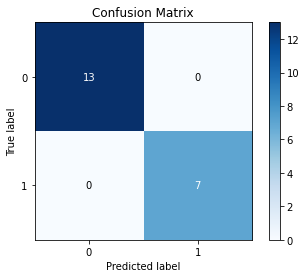

In [100]:
# Confusion Matrix
plot_confusion_matrix(y_test,predict)

In [101]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#### Netflix

In [102]:
#create the feature data set:
X=df_netflix

X=np.array(X.drop(['Label'],1))

In [103]:
#create the target data set:

y= np.array(df_netflix['Label'])

In [104]:
# Split the data:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 0, stratify=y)

In [105]:
#create and train the model:
model_netflix= LinearDiscriminantAnalysis().fit(x_train, y_train)

# Model predicton:

predict= model_netflix.predict(x_test)
predict

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [106]:
acc_netflix = round(model_netflix.score(x_train, y_train) * 100, 2)
accuracy_netflix=round(accuracy_score(y_test,predict)* 100, 2)


cm = confusion_matrix(y_test, predict)
accuracy = accuracy_score(y_test,predict)
precision =precision_score(y_test, predict,average='micro')
recall =  recall_score(y_test, predict,average='micro')
f1 = f1_score(y_test,predict,average='micro')

In [107]:
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[6 4]
 [3 7]]
accuracy_DecisionTree: 0.650
precision_DecisionTree: 0.650
recall_DecisionTree: 0.650
f1-score_DecisionTree : 0.650


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

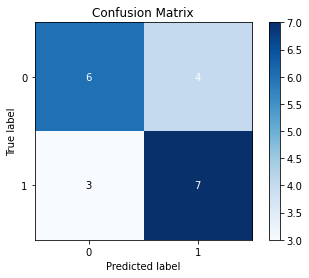

In [108]:
# Confusion Matrix
plot_confusion_matrix(y_test,predict)

In [109]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.64      0.70      0.67        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



#### Google

In [110]:
#create the feature data set:
X=df_google

X=np.array(X.drop(['Label'],1))

In [111]:
#create the target data set:

y= np.array(df_google['Label'])

In [112]:
# Split the data:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 0, stratify=y)

In [113]:
#create and train the model:
model_google= LinearDiscriminantAnalysis().fit(x_train, y_train)

# Model predicton:

predict= model_google.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [114]:
acc_google = round(model_google.score(x_train, y_train) * 100, 2)
accuracy_google=round(accuracy_score(y_test,predict)* 100, 2)


cm = confusion_matrix(y_test, predict)
accuracy = accuracy_score(y_test,predict)
precision =precision_score(y_test, predict,average='micro')
recall =  recall_score(y_test, predict,average='micro')
f1 = f1_score(y_test,predict,average='micro')

In [115]:
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[9 3]
 [6 2]]
accuracy_DecisionTree: 0.550
precision_DecisionTree: 0.550
recall_DecisionTree: 0.550
f1-score_DecisionTree : 0.550


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

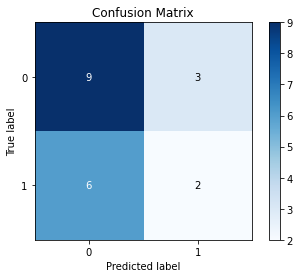

In [116]:
# Confusion Matrix
plot_confusion_matrix(y_test,predict)

In [117]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.40      0.25      0.31         8

    accuracy                           0.55        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.52      0.55      0.52        20



### Analysis of Models

In [118]:
results = pd.DataFrame({
    'Company': [ 'Facebook', 
              'Apple',
              'Amazon',
              'Netflix',
              'Google'],
    'Score': [ acc_fb,
              acc_apple,
              acc_amazon,
              acc_netflix,
              acc_google],
    "Accuracy_score":[accuracy_fb,
                      accuracy_apple,
                      accuracy_amazon,
                      accuracy_netflix,
                      accuracy_google
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Company,Score,Accuracy_score
0,Amazon,100.0,100.0
1,Apple,90.0,90.0
2,Netflix,80.0,65.0
3,Facebook,67.5,55.0
4,Google,67.5,55.0


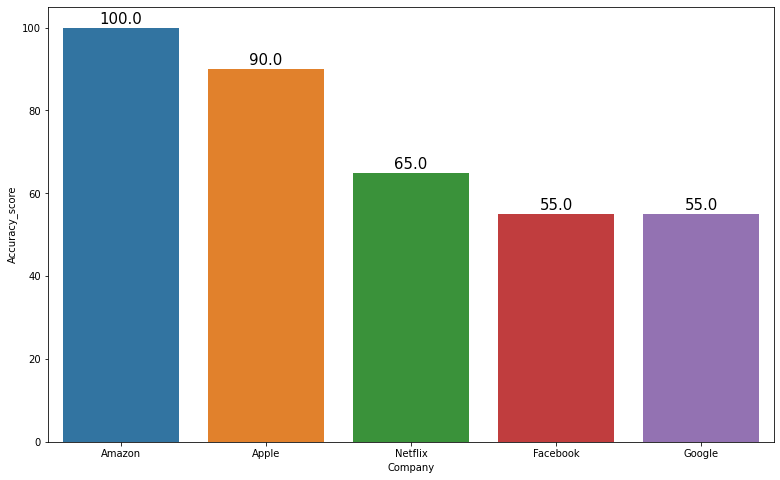

In [119]:
plt.subplots(figsize=(13,8))
ax=sns.barplot(x='Company',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

### Stock Price Prediction

In [132]:
to_predict = pd.DataFrame({
    'headline': [ 'Netflix Stock Surges Ahead Of Busy Schedule Of New Content Releases',
              "The Value and Growth Drivers that Justify Netflix's (NASDAQ:NFLX) Current Valuation",
              "Amazon to Sell a TV Line, Stepping Up Fight With Roku and Google",
              "Sorrell's S4 Capital ups profit outlook as losses widen",
              "Netflixs Sizzle Reel Needs to Impress"],
    'close': [ 606.710022,
            606.049988,
            597.539978,
            589.289978,
            582.869995],})

In [133]:
to_predict

,headline,close
0,Netflix Stock Surges Ahead Of Busy Schedule Of...,606.710022
1,The Value and Growth Drivers that Justify Netf...,606.049988
2,"Amazon to Sell a TV Line, Stepping Up Fight Wi...",597.539978
3,Sorrell's S4 Capital ups profit outlook as los...,589.289978
4,Netflixs Sizzle Reel Needs to Impress,582.869995


In [134]:
#selection data
df = to_predict[['headline', 'close']]
df.head()

,headline,close
0,Netflix Stock Surges Ahead Of Busy Schedule Of...,606.710022
1,The Value and Growth Drivers that Justify Netf...,606.049988
2,"Amazon to Sell a TV Line, Stepping Up Fight Wi...",597.539978
3,Sorrell's S4 Capital ups profit outlook as los...,589.289978
4,Netflixs Sizzle Reel Needs to Impress,582.869995


In [135]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df['clean_headline'] = df['headline'].apply(lambda x:remove_punctuation(x))
df.head()

,headline,close,clean_headline
0,Netflix Stock Surges Ahead Of Busy Schedule Of...,606.710022,Netflix Stock Surges Ahead Of Busy Schedule Of...
1,The Value and Growth Drivers that Justify Netf...,606.049988,The Value and Growth Drivers that Justify Netf...
2,"Amazon to Sell a TV Line, Stepping Up Fight Wi...",597.539978,Amazon to Sell a TV Line Stepping Up Fight Wit...
3,Sorrell's S4 Capital ups profit outlook as los...,589.289978,Sorrells S4 Capital ups profit outlook as loss...
4,Netflixs Sizzle Reel Needs to Impress,582.869995,Netflixs Sizzle Reel Needs to Impress


In [136]:
#Combine the top news headline:

headline_df= []

for row  in range (0, len(df.index)):
    headline_df.append("".join(str(x) for x in google.iloc[row, 5]))

headline_df

['3 Top Cloud Computing Stocks to Buy Right Now',
 '5 Unstoppable Trends to Invest $10,000 in Right Now',
 'Learn to embrace your digital wallethere are 8 benefits to love',
 'Facebook wraps up deals with Australian media firms, TV broadcaster SBS excluded',
 'Facebook wraps up deals with Australia media firms, TV broadcaster SBS not included']

In [137]:
# clean the data:
clean_headline_df = []

# Removing breaks and slashes
for i in range (0, len(headline_df)):
    clean_headline_df.append(re.sub("b[(')]", '', headline_df[i])) # remove b'
    clean_headline_df[i] = re.sub('b[(")]', '', headline_df[i]) # remove b"
    clean_headline_df[i] = re.sub("\'", '', headline_df[i]) # remove \'

clean_headline_df[0]

'3 Top Cloud Computing Stocks to Buy Right Now'

In [138]:
# Add the clean headline to the merge data:

df['clean_headline'] = clean_headline_df

df

,headline,close,clean_headline
0,Netflix Stock Surges Ahead Of Busy Schedule Of...,606.710022,3 Top Cloud Computing Stocks to Buy Right Now
1,The Value and Growth Drivers that Justify Netf...,606.049988,"5 Unstoppable Trends to Invest $10,000 in Righ..."
2,"Amazon to Sell a TV Line, Stepping Up Fight Wi...",597.539978,Learn to embrace your digital wallethere are 8...
3,Sorrell's S4 Capital ups profit outlook as los...,589.289978,Facebook wraps up deals with Australian media ...
4,Netflixs Sizzle Reel Needs to Impress,582.869995,Facebook wraps up deals with Australia media f...


In [139]:
df['Subjectivity'] = df['headline'].apply(get_subjectivity)

df['Polarity'] = df['headline'].apply(get_polarity)

In [140]:
# get Sentiment score for each day:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(df['clean_headline'])):
    SIA= getSIA(df['clean_headline'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

In [141]:
df['compound']= compound
df['neg']= neg
df['pos']=pos
df['neu']=neu

df

,headline,close,clean_headline,Subjectivity,Polarity,compound,neg,pos,neu
0,Netflix Stock Surges Ahead Of Busy Schedule Of...,606.710022,3 Top Cloud Computing Stocks to Buy Right Now,0.377273,0.118182,0.2023,0.000,0.184,0.816
1,The Value and Growth Drivers that Justify Netf...,606.049988,"5 Unstoppable Trends to Invest $10,000 in Righ...",0.400000,0.000000,-0.2023,0.184,0.000,0.816
2,"Amazon to Sell a TV Line, Stepping Up Fight Wi...",597.539978,Learn to embrace your digital wallethere are 8...,0.000000,0.000000,0.8442,0.000,0.532,0.468
3,Sorrell's S4 Capital ups profit outlook as los...,589.289978,Facebook wraps up deals with Australian media ...,0.000000,0.000000,-0.3400,0.179,0.000,0.821
4,Netflixs Sizzle Reel Needs to Impress,582.869995,Facebook wraps up deals with Australia media f...,0.000000,0.000000,0.0000,0.000,0.000,1.000


In [142]:
#create the feature data set:

del df['clean_headline']

X=df

X=np.array(X.drop(['headline'],1))

In [144]:
predict= model_netflix.predict(X)
predict

array([1, 1, 0, 1, 0], dtype=int64)